In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 50)

data = pd.read_csv('flight.csv')
df = data.copy()

# Exploratory Data Analysis (EDA)

### Check Null Value, Missing Value, and Data Types

In [2]:
# df.head(5)
df[df['WORK_CITY']=='.']

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,210,505308,239560.0,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,135,351159,163618.0,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
20,21501,7/30/2008,11/21/2008,Male,6,.,beijing,CN,49.0,3/31/2014,106,220641,69566.0,122763.0,167113,3/28/2014,4,6.438095,31,4,1.369404,251134,9
27,47114,1/15/2005,3/17/2005,Male,6,.,beijing,CN,47.0,3/31/2014,74,209810,101398.0,83139.0,148685,3/21/2014,11,9.493151,51,8,1.433364,235176,14
40,18793,4/25/2006,6/2/2006,Male,6,.,beijing,CN,48.0,3/31/2014,98,191809,88788.0,85119.0,137876,3/30/2014,2,7.505155,46,11,1.458541,210435,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61806,4388,4/20/2011,12/10/2011,Male,4,.,beijing,CN,40.0,3/31/2014,2,634,756.0,0.0,1586,2/1/2013,425,1.000000,1,0,0.571627,634,0
62035,10787,8/29/2012,10/16/2013,Male,6,.,beijing,CN,55.0,3/31/2014,2,776,0.0,1044.0,1199,10/18/2013,166,2.000000,2,0,0.707698,1133,3
62099,41502,1/1/2012,1/1/2012,Female,4,.,shanghai,CN,44.0,3/31/2014,2,692,NaN,0.0,2085,6/5/2012,666,2.000000,2,0,0.400000,692,0
62546,15528,6/3/2012,6/3/2012,Male,4,.,beijing,CN,44.0,3/31/2014,2,576,970.0,0.0,1629,3/14/2013,384,284.000000,284,0,0.417772,576,0


**There are 667 rows from WORK_CITY and WORK_PROVINCE feature with a single character only (.) instead of the name of the city**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

In [4]:
df.isna().sum()

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            2269
WORK_PROVINCE        3248
WORK_COUNTRY           26
AGE                   420
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              551
SUM_YR_2              138
SEG_KM_SUM              0
LAST_FLIGHT_DATE        0
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

**The following feature has a missing value on it:**
1. GENDER
2. WORK_CITY
3. WORK_PROVINCE
4. WORK_COUNTRY
5. AGE
6. SUM_YR_1
7. SUM_YR_2

**Also, the date time features like FFP_DATE, FIRST_FLIGHT_DATE, LOAD_TIME, and LAST_FLIGHT_DATE is not on the proper types as well**

### Check Duplicate Values

In [5]:
df.duplicated().sum()

0

**No duplicate values found on the dataset**

### Descriptive Analysis

In [6]:
numericals = ['AGE', 'FFP_TIER', 'EXCHANGE_COUNT','FLIGHT_COUNT', 'BP_SUM','SUM_YR_1','SUM_YR_2','SEG_KM_SUM','LAST_TO_END','AVG_INTERVAL', 'MAX_INTERVAL','avg_discount','Points_Sum','Point_NotFlight']
categoricals = ['FFP_DATE','GENDER','FIRST_FLIGHT_DATE','WORK_CITY', 'WORK_PROVINCE','WORK_COUNTRY','LAST_FLIGHT_DATE']

#LOAD_TIME only contain one value

In [7]:
df.describe()

,MEMBER_NO,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,62988.000000,62988.000000,62568.000000,62988.000000,62988.000000,62437.000000,62850.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.0000,62988.000000
mean,31494.500000,4.102162,42.476346,11.839414,10925.081254,5355.376064,5604.026014,17123.878691,176.120102,67.749788,166.033895,0.319775,0.721558,12545.7771,2.728155
std,18183.213715,0.373856,9.885915,14.049471,16339.486151,8109.450147,8703.364247,20960.844623,183.822223,77.517866,123.397180,1.136004,0.185427,20507.8167,7.364164
min,1.000000,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,15747.750000,4.000000,35.000000,3.000000,2518.000000,1003.000000,780.000000,4747.000000,29.000000,23.370370,79.000000,0.000000,0.611997,2775.0000,0.000000
50%,31494.500000,4.000000,41.000000,7.000000,5700.000000,2800.000000,2773.000000,9994.000000,108.000000,44.666667,143.000000,0.000000,0.711856,6328.5000,0.000000
75%,47241.250000,4.000000,48.000000,15.000000,12831.000000,6574.000000,6845.750000,21271.250000,268.000000,82.000000,228.000000,0.000000,0.809476,14302.5000,1.000000
max,62988.000000,6.000000,110.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.000000,728.000000,728.000000,46.000000,1.500000,985572.0000,140.000000


**Almost all the features are having a quite major of the gap between min and max OR Q3 and max (outliers indications), except for the following features:**
1. FFP_TIER
2. EXCHANGE_COUNT
3. avg_discount

### Univariate Analysis

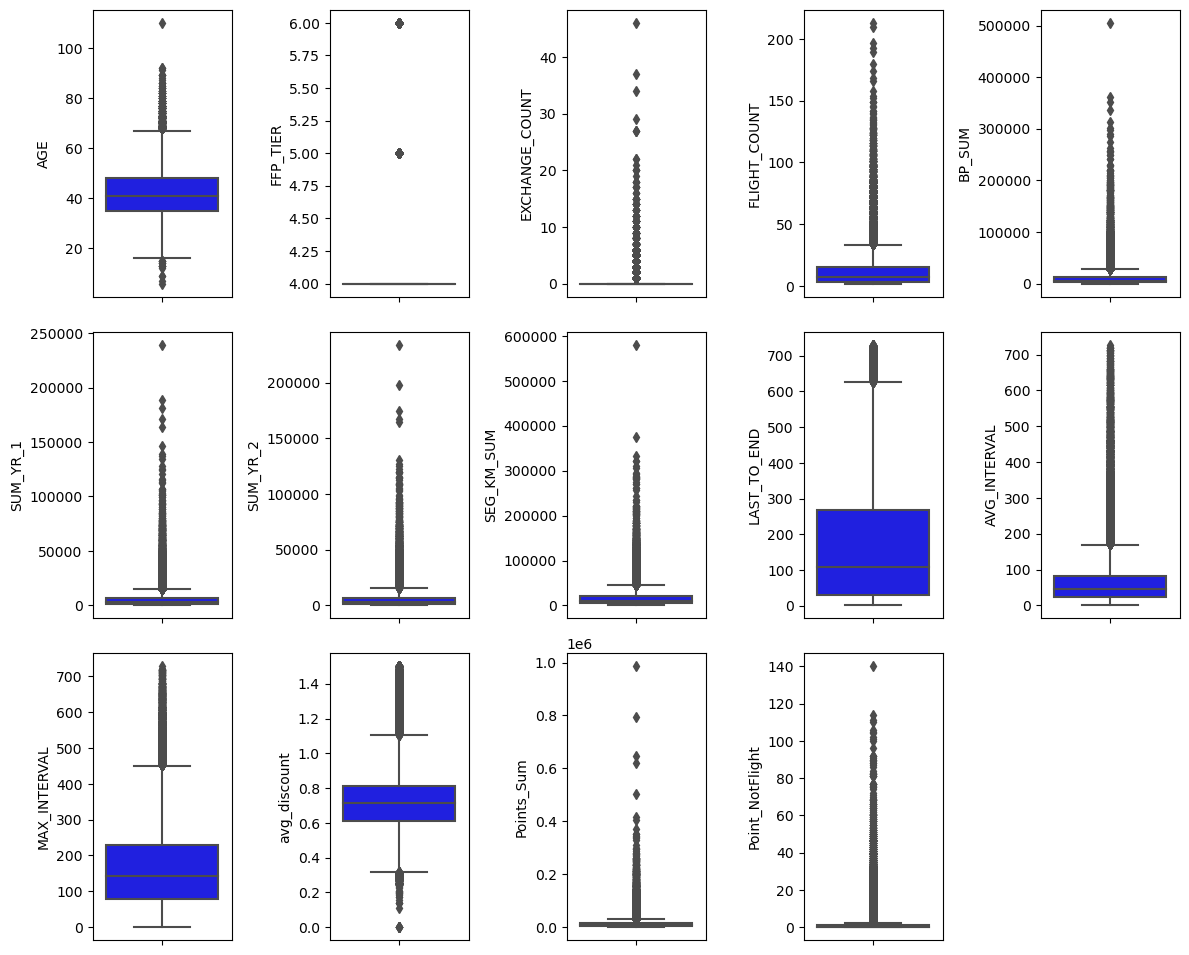

In [8]:
plt.figure(figsize=(12,45))
for i in range(0, len(numericals)):
    plt.subplot(len(numericals), 5,i+1)
    sns.boxplot(y=df[numericals[i]], color='blue', orient='v')
    plt.tight_layout()

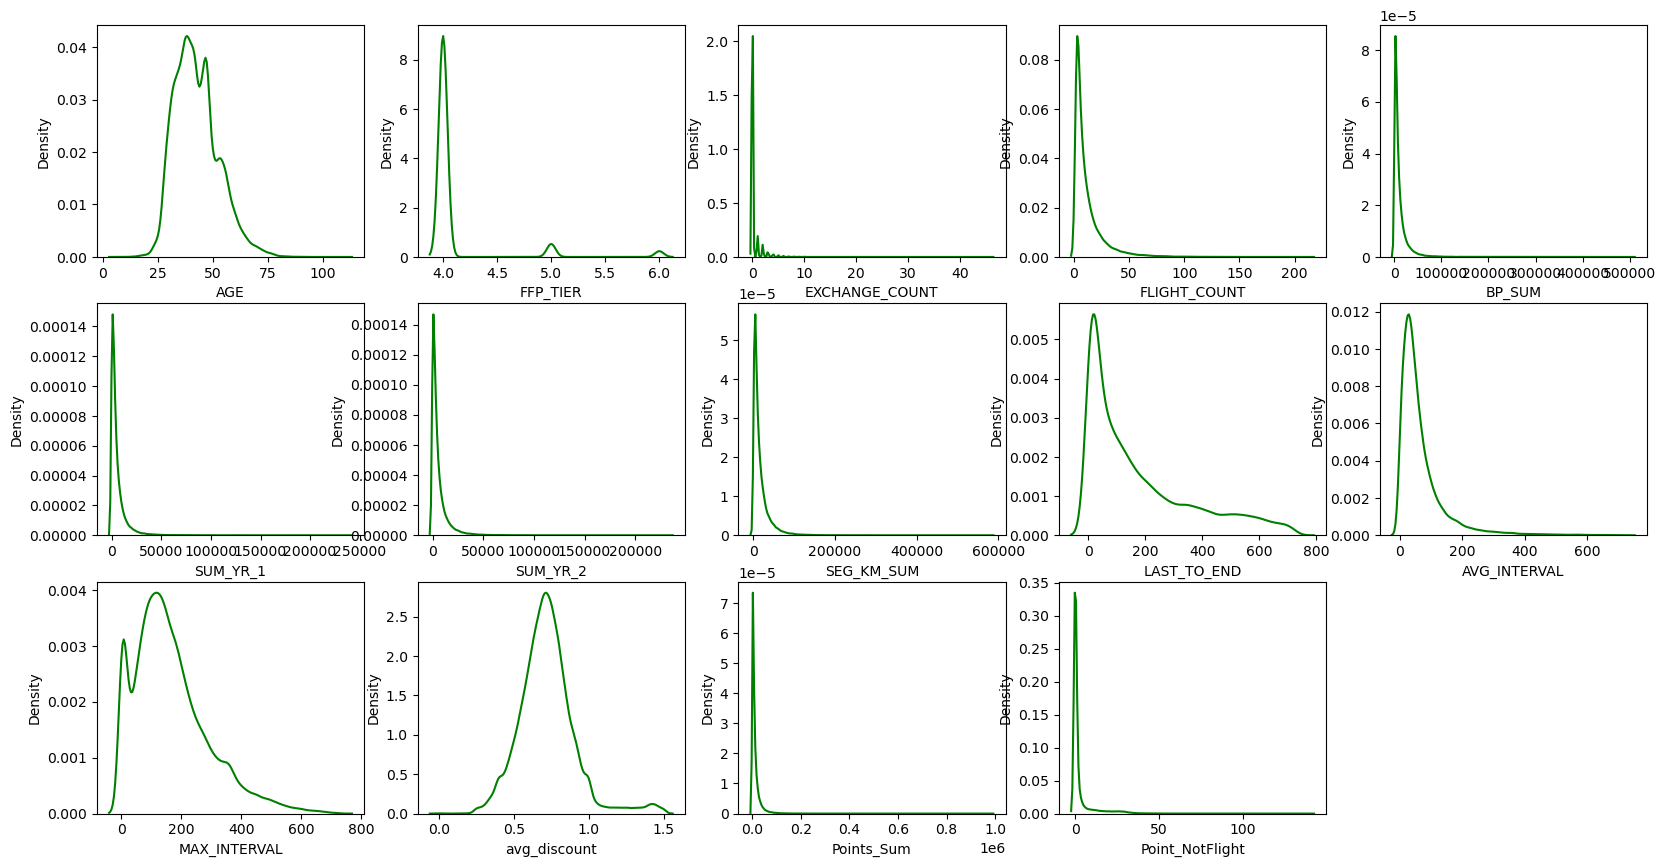

In [9]:
plt.figure(figsize=(20,50))
for i in range(len(numericals)):
    plt.subplot(len(numericals), 5, i+1)
    sns.kdeplot(x=df[numericals[i]], color='green')

**The only feature with normal distribution is AGE**

### Multivariate Analysis

<AxesSubplot:>

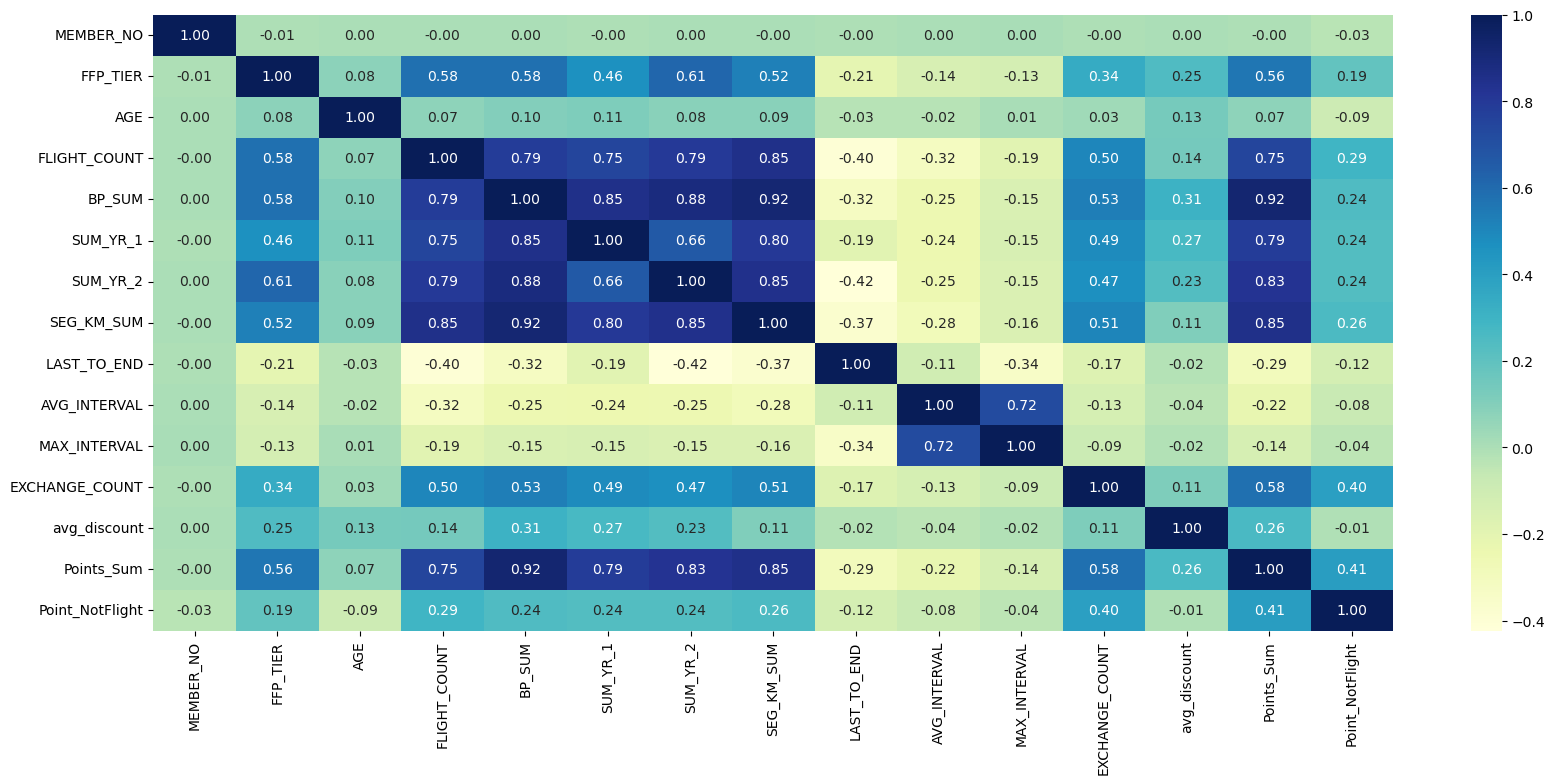

In [10]:
corr = df.corr(method='pearson')

plt.figure(figsize=(20,8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='YlGnBu')

In [11]:
high_corr = []
for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > 0.7: # jika korelasi lebih besar dari 0.7
            print(f"{corr.columns[i]} and {corr.columns[j]} have a correlation of \033[1m{corr.iloc[i, j]:.2f}\033[0m")
            high_corr.append((corr.columns[i], corr.columns[j]))

print(f"Features with High Correlation: {high_corr}")

BP_SUM and FLIGHT_COUNT have a correlation of 0.79
SUM_YR_1 and FLIGHT_COUNT have a correlation of 0.75
SUM_YR_1 and BP_SUM have a correlation of 0.85
SUM_YR_2 and FLIGHT_COUNT have a correlation of 0.79
SUM_YR_2 and BP_SUM have a correlation of 0.88
SEG_KM_SUM and FLIGHT_COUNT have a correlation of 0.85
SEG_KM_SUM and BP_SUM have a correlation of 0.92
SEG_KM_SUM and SUM_YR_1 have a correlation of 0.80
SEG_KM_SUM and SUM_YR_2 have a correlation of 0.85
MAX_INTERVAL and AVG_INTERVAL have a correlation of 0.72
Points_Sum and FLIGHT_COUNT have a correlation of 0.75
Points_Sum and BP_SUM have a correlation of 0.92
Points_Sum and SUM_YR_1 have a correlation of 0.79
Points_Sum and SUM_YR_2 have a correlation of 0.83
Points_Sum and SEG_KM_SUM have a correlation of 0.85
Features with High Correlation: [('BP_SUM', 'FLIGHT_COUNT'), ('SUM_YR_1', 'FLIGHT_COUNT'), ('SUM_YR_1', 'BP_SUM'), ('SUM_YR_2', 'FLIGHT_COUNT'), ('SUM_YR_2', 'BP_SUM'), ('SEG_KM_SUM', 'FLIGHT_COUNT'), ('SEG_KM_SUM', 'BP_SUM'), 

**Based on the multivariate analysis above, some features have high correlation scores with the other feature. This means there is a redundant possibility among those features. Thus, it needs further analysis to determine whether one of the features should be deleted or not**

**Moreover, since the date-time feature such as FFP_DATE, FIRST_FLIGHT_DATE, LOAD_TIME, and LAST_FLIGHT_DATE are already represented by the AVG_INTERVAL, which informed the average flight time and the maximum flight time, it will be deleted in the next step**

# Data Preprocessing

### Handling Missing and Incorrect Value

In [12]:
df[categoricals].describe()

,FFP_DATE,GENDER,FIRST_FLIGHT_DATE,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,LAST_FLIGHT_DATE
count,62988,62985,62988,60719,59740,62962,62988
unique,3068,2,3406,3234,1165,118,731
top,1/13/2011,Male,2/16/2013,guangzhou,guangdong,CN,3/31/2014
freq,184,48134,96,9386,17509,57748,959


In [13]:
mode_value_work_city = df['WORK_CITY'].mode()[0]
mode_value_work_province = df['WORK_PROVINCE'].mode()[0]

df['WORK_CITY'] = df['WORK_CITY'].replace('.', mode_value_work_city)
df['WORK_PROVINCE'] = df['WORK_PROVINCE'].replace('.', mode_value_work_province)

In [14]:
df.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,guangzhou,beijing,CN,31.0,3/31/2014,210,505308,239560.0,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,140,362480,171483.0,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,guangzhou,beijing,CN,40.0,3/31/2014,135,351159,163618.0,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,23,337314,116350.0,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,152,273844,124560.0,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


**Changing the dot (.) value in WORK_CITY into the mode value**

In [15]:
df.dropna(inplace=True)

In [16]:
df.isna().sum()

MEMBER_NO            0
FFP_DATE             0
FIRST_FLIGHT_DATE    0
GENDER               0
FFP_TIER             0
WORK_CITY            0
WORK_PROVINCE        0
WORK_COUNTRY         0
AGE                  0
LOAD_TIME            0
FLIGHT_COUNT         0
BP_SUM               0
SUM_YR_1             0
SUM_YR_2             0
SEG_KM_SUM           0
LAST_FLIGHT_DATE     0
LAST_TO_END          0
AVG_INTERVAL         0
MAX_INTERVAL         0
EXCHANGE_COUNT       0
avg_discount         0
Points_Sum           0
Point_NotFlight      0
dtype: int64

**Because the missing value is around 5%, it still safe to be deleted from the dataset**

In [17]:
#Deleting Member ID Column
df = df.drop(columns=['MEMBER_NO'])

In [18]:
df.sample(5)

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
30020,7/8/2007,5/12/2010,Male,4,guangzhou,guangdong,CN,32.0,3/31/2014,4,7632,6460.0,0.0,7868,5/25/2012,677,18.000000,36,1,0.950000,19732,4
28351,7/30/2012,7/30/2012,Male,4,taiyuan,shanxi,CN,47.0,3/31/2014,8,7214,4000.0,3029.0,8846,1/29/2014,63,78.285714,215,0,0.913684,7214,0
10701,12/17/2008,5/23/2010,Male,4,guangzhou,guangdong,CN,63.0,3/31/2014,18,17427,11484.0,6126.0,30368,10/15/2013,169,24.470588,114,0,0.687793,17427,0
51066,1/12/2010,3/5/2010,Male,4,jinjiang,fujian,CN,41.0,3/31/2014,5,2685,1535.0,2288.0,3155,11/11/2013,142,119.000000,355,0,0.822000,2685,0
44,12/4/2004,2/27/2005,Male,6,guangzhoushi,guangdongsheng,CN,49.0,3/31/2014,54,208801,99145.0,84348.0,160825,2/23/2014,38,13.056604,52,0,1.208534,230772,4


### Encode All Categoricals Value

In [19]:
cats = ['GENDER', 'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY']
df_encode = df.copy()
for i in cats:
    df_encode[i] = df_encode[i].astype('category').cat.codes

In [20]:
df_encode.sample(5)

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
34262,6/3/2007,6/16/2008,1,4,1562,812,21,41.0,3/31/2014,4,5506,3850.0,1313.0,8308,5/6/2013,331,127.666667,350,0,0.737500,5506,0
57609,2/11/2006,2/11/2006,1,4,1888,1103,21,50.0,3/31/2014,2,1150,630.0,897.0,3073,7/5/2013,271,272.000000,272,0,0.529339,1150,0
4086,10/25/2005,11/23/2005,1,4,1825,874,21,50.0,3/31/2014,32,25835,12069.0,20132.0,62835,3/18/2014,14,21.483871,107,0,0.604522,27483,1
5591,12/26/2006,6/18/2007,1,4,1562,812,21,72.0,3/31/2014,27,25180,14983.0,12798.0,45352,3/22/2014,10,26.038462,114,1,0.706082,25180,1
6762,11/1/2009,11/10/2009,1,4,1835,874,21,39.0,3/31/2014,28,19696,10162.0,13608.0,46043,3/2/2014,30,23.814815,117,0,0.617588,23101,7


### Removing Redundant and Unnecessary Features

**Based on the correlation analysis before and the Feature Importance analysis, therefore, the following features will be deleted due to redundant and unnecessary value:**
1. FLIGHT_COUNT
2. BP_SUM
3. SUM_YR_1
4. SUM_YR_2
5. SEG_KM_SUM
6. MAX_INTERVAL
7. LAST_FLIGHT_DATE
8. FFP_DATE 
9. FIRST_FLIGHT_DATE
10. LOAD_TIME

In [21]:
df_encode.drop(columns=['FLIGHT_COUNT','BP_SUM','SUM_YR_1','SUM_YR_2','SEG_KM_SUM',
                        'MAX_INTERVAL', 'FFP_DATE', 'FIRST_FLIGHT_DATE', 'LOAD_TIME', 'LAST_FLIGHT_DATE'], inplace=True)

In [22]:
df_encode.sample(5)

,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LAST_TO_END,AVG_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
31151,1,4,2412,859,21,48.0,110,57.333333,0,0.855363,8350,1
40136,0,4,2890,913,21,37.0,321,11.500000,0,0.884916,4371,0
23542,1,4,1562,812,21,36.0,93,100.200000,0,0.799222,8625,0
4849,1,5,1835,874,21,33.0,10,17.950000,4,0.735282,35041,7
47736,0,4,1825,874,21,31.0,240,242.500000,0,0.566413,3234,0


### Removing Outliers

In [23]:
def remove_outliers(column):
    for col in column:
        Q1 = df_encode[col].quantile(0.25)
        Q3 = df_encode[col].quantile(0.75)
        IQR = Q3 - Q1
        low_limit = Q1-(1.5*IQR)
        high_limit = Q3+(1.5*IQR)
        filtered_entries = ((df_encode[col] >= low_limit) & (df_encode[col] <= high_limit))
    
    return df_encode[filtered_entries]

In [24]:
df_encode.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58255 entries, 0 to 62986
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   GENDER           58255 non-null  int8   
 1   FFP_TIER         58255 non-null  int64  
 2   WORK_CITY        58255 non-null  int16  
 3   WORK_PROVINCE    58255 non-null  int16  
 4   WORK_COUNTRY     58255 non-null  int8   
 5   AGE              58255 non-null  float64
 6   LAST_TO_END      58255 non-null  int64  
 7   AVG_INTERVAL     58255 non-null  float64
 8   EXCHANGE_COUNT   58255 non-null  int64  
 9   avg_discount     58255 non-null  float64
 10  Points_Sum       58255 non-null  int64  
 11  Point_NotFlight  58255 non-null  int64  
dtypes: float64(3), int16(2), int64(5), int8(2)
memory usage: 4.3 MB


In [25]:
df_encode = remove_outliers(df_encode.columns)

In [26]:
df_encode.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47506 entries, 43 to 62986
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   GENDER           47506 non-null  int8   
 1   FFP_TIER         47506 non-null  int64  
 2   WORK_CITY        47506 non-null  int16  
 3   WORK_PROVINCE    47506 non-null  int16  
 4   WORK_COUNTRY     47506 non-null  int8   
 5   AGE              47506 non-null  float64
 6   LAST_TO_END      47506 non-null  int64  
 7   AVG_INTERVAL     47506 non-null  float64
 8   EXCHANGE_COUNT   47506 non-null  int64  
 9   avg_discount     47506 non-null  float64
 10  Points_Sum       47506 non-null  int64  
 11  Point_NotFlight  47506 non-null  int64  
dtypes: float64(3), int16(2), int64(5), int8(2)
memory usage: 3.5 MB


In [27]:
df_encode.isna().sum()

GENDER             0
FFP_TIER           0
WORK_CITY          0
WORK_PROVINCE      0
WORK_COUNTRY       0
AGE                0
LAST_TO_END        0
AVG_INTERVAL       0
EXCHANGE_COUNT     0
avg_discount       0
Points_Sum         0
Point_NotFlight    0
dtype: int64

### Data Transform

In [28]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
X_scaled = scalar.fit_transform(df_encode)
X_std = pd.DataFrame(X_scaled, columns=df_encode.columns)

In [29]:
X_std.sample(5)

,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LAST_TO_END,AVG_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
9885,0.562456,-0.207069,-0.332873,-0.082537,-0.210883,-0.861135,-0.815822,-0.622724,-0.257250,-1.054991,0.050188,-0.439766
3991,0.562456,-0.207069,1.218150,1.141026,-0.210883,0.547126,-0.972564,-0.398123,2.660137,0.202168,1.062801,3.245459
33064,-1.777917,-0.207069,1.666932,0.146881,-0.210883,-0.458775,1.486654,-0.099032,-0.257250,0.105847,-0.550200,-0.439766
10609,0.562456,-0.207069,-0.826722,-0.447253,-0.210883,0.245356,-0.886086,-0.465418,5.577524,-0.256501,0.269837,3.245459
17528,0.562456,-0.207069,-0.727201,0.235119,-0.210883,-0.559365,-0.891490,-0.314004,-0.257250,-0.878441,-0.206998,-0.439766


### Dimensional Reduction

In [30]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pcs = pca.fit_transform(X_std)
pdf = pd.DataFrame(data = pcs, columns = ['pc1','pc2','pc3','pc4'])

In [31]:
pdf.describe()

,pc1,pc2,pc3,pc4
count,4.750600e+04,4.750600e+04,4.750600e+04,4.750600e+04
mean,-1.069700e-14,-5.147514e-16,8.339316e-16,-1.804177e-18
std,1.500969e+00,1.449283e+00,1.144877e+00,1.064318e+00
min,-2.927221e+00,-3.089083e+00,-6.154984e+00,-3.166282e+00
25%,-9.084248e-01,-8.327105e-01,-5.404430e-01,-5.223593e-01
50%,-3.938673e-01,-1.900092e-01,1.189033e-01,3.349765e-02
75%,3.742360e-01,3.402809e-01,6.307157e-01,4.596906e-01
max,1.652278e+01,9.129808e+00,6.490907e+00,7.136471e+00


# Identify Number of Clusters

### Identify the optimal number of cluster

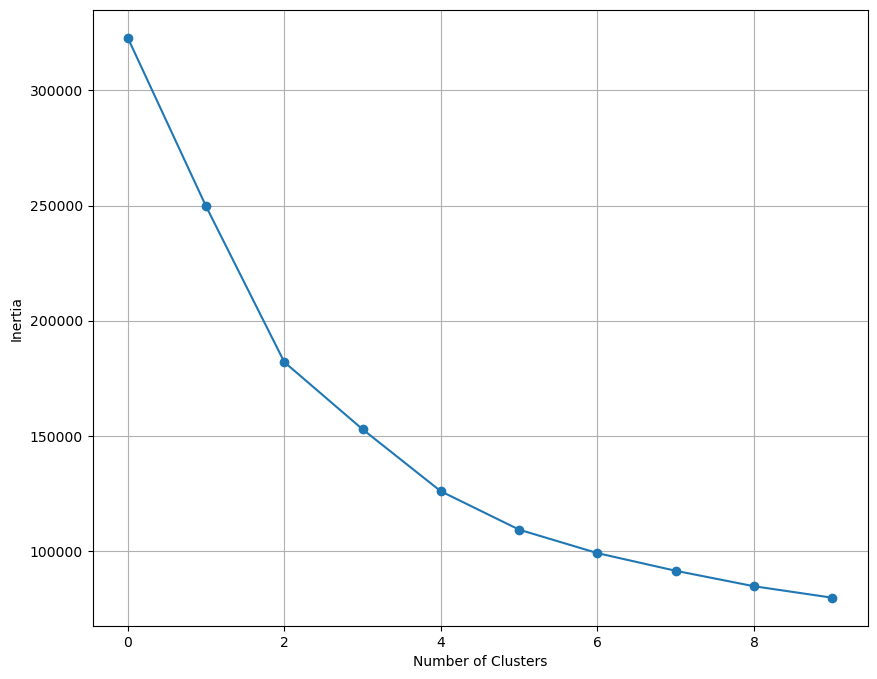

In [32]:
from sklearn.cluster import KMeans

inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(pdf.values)
    inertia.append(kmeans.inertia_)
    
plt.figure(figsize=(10,8))
plt.plot(inertia,'o-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

**Based on the Elbow Graph above, the optimal number of clusters would be 4/5 clusters**

# Evaluate Model

Silhouette average score for k=2:  0.44074022984937794
Silhouette average score for k=3:  0.4814960417338004
Silhouette average score for k=4:  0.2533926001194869
Silhouette average score for k=5:  0.28275596716872253
Silhouette average score for k=6:  0.28087545811161363


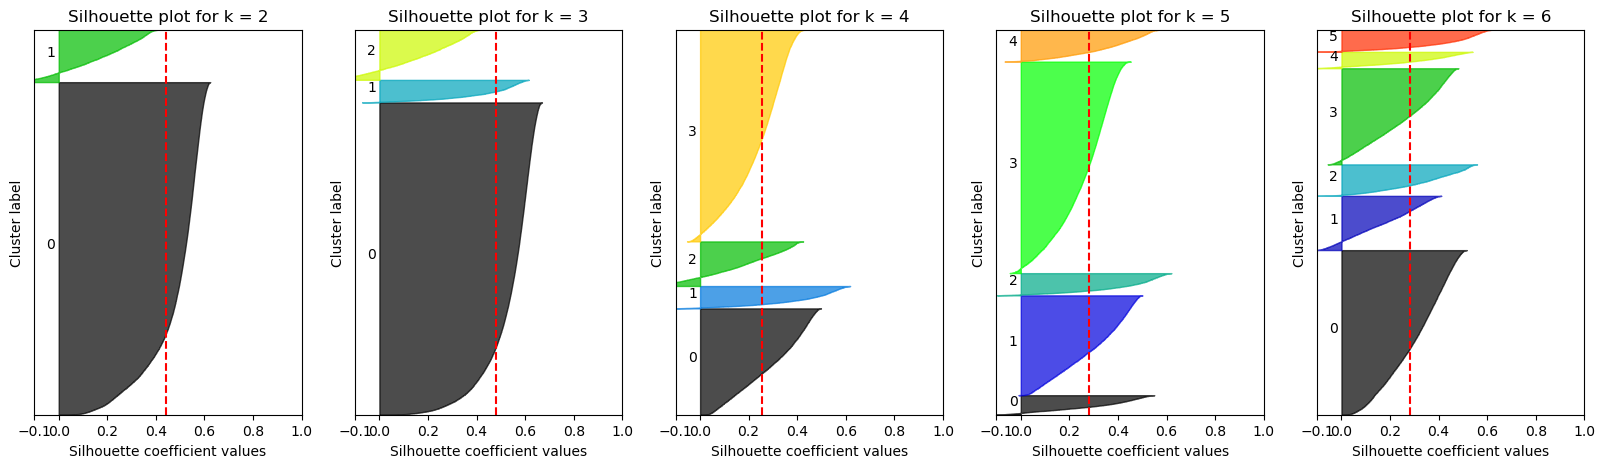

In [33]:
from sklearn.metrics import silhouette_score, silhouette_samples

# define range of k values
k_values = range(2, 7)

# create subplots
fig, axs = plt.subplots(1, len(k_values), figsize=(20, 5))

# iterate over each k value
for i, k in enumerate(k_values):
    # fit k-means model
    kmeans_eval = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    #labels = kmeans_eval.labels_
    labels = kmeans_eval.fit_predict(pdf)

    # calculate silhouette score
    silhouette_avg = silhouette_score(pdf, labels)

    # calculate silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(pdf, labels)

    print(f"Silhouette average score for k={k}: ", silhouette_avg)
    
    # plot silhouette plot
    y_lower = 10
    axs[i].set_xlim([-0.1, 1])
    axs[i].set_ylim([0, len(pdf) + (k + 1) * 10])
    axs[i].set_title('Silhouette plot for k = {}'.format(k))
    axs[i].set_xlabel('Silhouette coefficient values')
    axs[i].set_ylabel('Cluster label')

    for j in range(k):
        # aggregate silhouette scores for samples in cluster j
        ith_cluster_silhouette_values = sample_silhouette_values[labels == j]
        ith_cluster_silhouette_values.sort()

        size_cluster_j = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_j

        color = plt.cm.nipy_spectral(float(j) / k)
        axs[i].fill_betweenx(np.arange(y_lower, y_upper),
                              0,
                              ith_cluster_silhouette_values,
                              facecolor=color,
                              edgecolor=color,
                              alpha=0.7)

        # label silhouette plots with their cluster numbers at the middle
        axs[i].text(-0.05, y_lower + 0.5 * size_cluster_j, str(j))

        # compute new y_lower for next plot
        y_lower = y_upper + 10

    axs[i].axvline(x=silhouette_avg, color='red', linestyle='--')
    axs[i].set_yticks([])
    axs[i].set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()


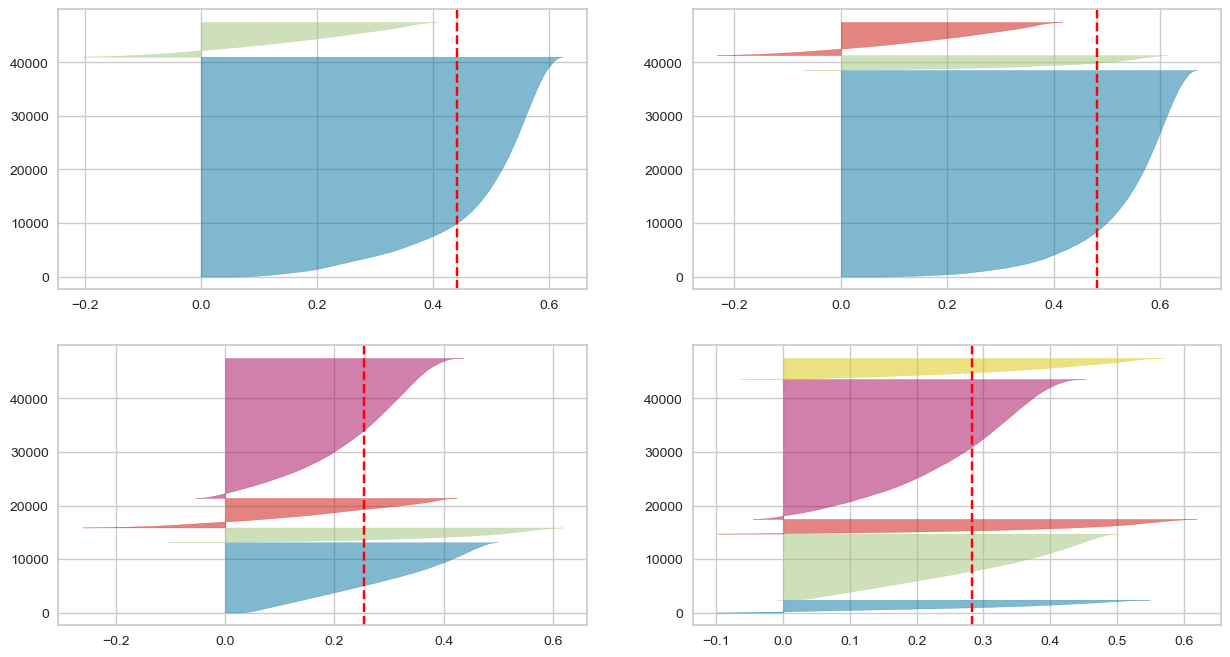

In [34]:
# ! pip install yellowbrick
from yellowbrick.cluster import SilhouetteVisualizer
 
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(pdf) 

**Based on the width of every cluster and the average silhoueete score, it can be seen that dividing the data into 4/5 clusters is the good option. However, based on the silhouette score that calculate the performance of the model, dividing data into 5 clusters is the most optimal option**

# Fitting Model - KMeans

In [35]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(pdf)

In [36]:
pdf['labels'] = kmeans.labels_

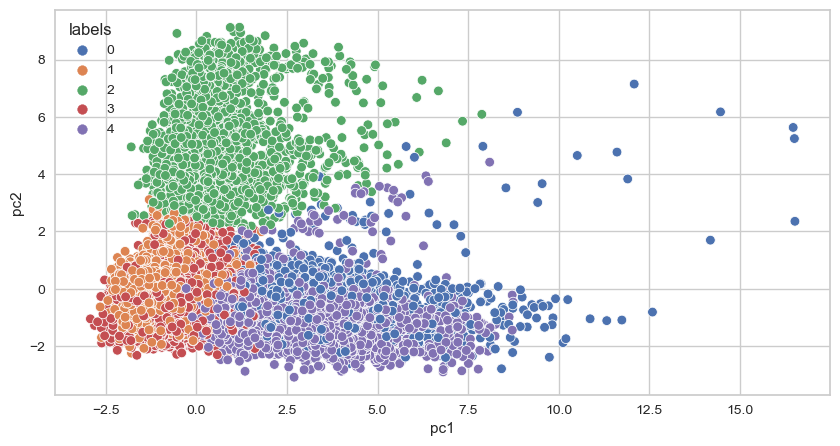

In [37]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=pdf, x='pc1', y='pc2', hue='labels', palette='deep')
plt.show()

In [38]:
pdf['labels'].value_counts()

3    26122
1    12325
4     3923
2     2736
0     2400
Name: labels, dtype: int64

# Business Insight

### Returning the Preprocessed dataframe to original

In [47]:
df_encode.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47506 entries, 43 to 62986
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   GENDER           47506 non-null  object 
 1   FFP_TIER         47506 non-null  int64  
 2   WORK_CITY        47506 non-null  object 
 3   WORK_PROVINCE    47506 non-null  object 
 4   WORK_COUNTRY     47506 non-null  object 
 5   AGE              47506 non-null  float64
 6   LAST_TO_END      47506 non-null  int64  
 7   AVG_INTERVAL     47506 non-null  float64
 8   EXCHANGE_COUNT   47506 non-null  int64  
 9   avg_discount     47506 non-null  float64
 10  Points_Sum       47506 non-null  int64  
 11  Point_NotFlight  47506 non-null  int64  
 12  labels_cluster   47506 non-null  int32  
dtypes: float64(3), int32(1), int64(5), object(4)
memory usage: 5.9+ MB


In [41]:
# pdf.drop(columns=['labels'], inplace=True)
for col in cats:
    codes = df_encode[col].unique()
    labels = df[col].unique()
    mapping = dict(zip(codes, labels))
    df_encode[col] = df_encode[col].replace(mapping)

predict = kmeans.predict(pdf)
df_encode['labels_cluster'] = pd.Series(predict, index=df_encode.index)

In [74]:
df_encode['WORK_COUNTRY'].value_counts()

CN    44431
GN      682
CA      611
FR      446
HK      351
      ...  
BE        1
DK        1
AB        1
NG        1
HU        1
Name: WORK_COUNTRY, Length: 105, dtype: int64

In [43]:
num_dtypes = ['int32','int64','float64']
cat_dtypes = ['object']

num_df = df_encode.select_dtypes(include=num_dtypes)
cat_df = df_encode.select_dtypes(include=cat_dtypes)

numericals = num_df.columns
categoricals = cat_df.columns

In [59]:
num_info = df_encode[numericals].groupby('labels_cluster').agg(['mean', 'median', 'std', 'min', 'max'])
num_info

FFP_TIER                                 AGE         \
                    mean median       std min max       mean median   
labels_cluster                                                        
0               4.914583    5.0  0.670802   4   6  47.991250   47.0   
1               4.000406    4.0  0.020138   4   5  39.382718   38.0   
2               4.009868    4.0  0.098867   4   5  47.316155   47.0   
3               4.005091    4.0  0.071174   4   5  43.052599   42.0   
4               4.071629    4.0  0.276051   4   6  42.632424   41.0   

                                      LAST_TO_END                              \
                      std   min   max        mean median         std min  max   
labels_cluster                                                                  
0                9.222750  22.0  89.0   54.725417   19.0   92.956148   1  716   
1                9.448925   7.0  92.0  400.756024  401.0  170.462598   1  731   
2               11.391031  12.0  92.0  264.594664  218.0  210.111148   1  726   
3                9.644720   6.0  86.0   99.210818   74.0   91.194344   1  555   
4                9.345103  16.0  91.0  101.880194   55.0  121.865551   1  721   

               AVG_INTERVAL                                   EXCHANGE_COUNT  \
                       mean     median        std  min    max           mean   
labels_cluster                                                                 
0                 31.515201  22.067816  33.904303  0.0  555.0       0.065000   
1                 38.226977  30.500000  35.380734  0.0  247.0       0.000649   
2                 65.632478  44.545455  75.871444  0.0  670.0       0.024123   
3                 96.262803  65.555556  93.780097  0.0  728.0       0.000306   
4                 48.137166  36.214286  40.778046  0.0  459.0       1.007137   

                                        avg_discount                      \
               median       std min max         mean    median       std   
labels_cluster                                                             
0                 0.0  0.262939   0   2     0.938649  0.841117  0.259514   
1                 0.0  0.025470   0   1     0.679438  0.677259  0.188518   
2                 0.0  0.169317   0   2     0.757988  0.746375  0.187351   
3                 0.0  0.017498   0   1     0.710401  0.706240  0.155882   
4                 1.0  0.658332   0   2     0.719376  0.712800  0.142900   

                                 Points_Sum                              \
                     min  max          mean   median           std  min   
labels_cluster                                                            
0               0.433291  1.5  33167.679583  30337.0  21804.671415  446   
1               0.000000  1.5   3764.433671   2714.0   3456.149579    0   
2               0.200000  1.5   8838.873904   5000.5  11126.007290    0   
3               0.000000  1.5   7737.188692   5840.0   6405.174179    0   
4               0.137586  1.5  16135.524344  13809.0  11046.465957    0   

                       Point_NotFlight                           
                   max            mean median       std min max  
labels_cluster                                                   
0               208960        0.560000    0.0  0.712936   0   2  
1                50423        0.060365    0.0  0.254318   0   2  
2               133754        0.168494    0.0  0.457049   0   2  
3                55373        0.102366    0.0  0.307025   0   2  
4                71428        1.558756    2.0  0.496599   1   2

In [52]:
cat_info = df_encode[categoricals].join(df_encode['labels_cluster']).groupby('labels_cluster').agg(pd.Series.mode)
cat_info

,GENDER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY
labels_cluster,,,,
0,Male,guangzhou,beijing,CN
1,Male,guangzhou,beijing,CN
2,Male,EDOGAWA-KU,SHIZUOKA PREF,GN
3,Male,PUCHONG,beijing,CN
4,Male,guangzhou,beijing,CN


In [46]:
df_encode['labels_cluster'].value_counts()

3    26122
1    12325
4     3923
2     2736
0     2400
Name: labels_cluster, dtype: int64

### Insight Extraction

Based on the previous clustering analysis, here are the segmentation for every cluster created:
1. Label 0: Male (46-47 yo) who works in **Guangzhou, Beijing, China,** with an average flight time of **31 hours** and holds a Tier 5 membership

2. Label 1: Male (38-39 yo) who works in **Guangzhou, Beijing, China,** with an average flight time of **38 hours** and holds a Tier 4 membership

3. Label 2: Male (47-47 yo) who works in **Edogawa-ku, Shizuoka Pref, Japan and Guienea,** with an average flight time of **65 hours** and holds a Tier 4 membership

4. Label 3: Male (42-43 yo) who works in **Puchong, Beijing, China,** with an average flight time of **96 hours** and holds a Tier 4 membership

5. Label 4: Male (41-42 yo) who works in **Guangzhou, Beijing, China,** with an average flight time of **48 hours** and holds a Tier 4 membership

### Business Recommendation

Since people from **Puchong, Beijing, China** are the highest segment of all, the company might be able to apply some bundling promo trips **from/to Puchong, Beijing, China** to drive more customers.

The strategy also can be applied well for customers from/to **Edogawa-ku, Shizuoka Pref, Japan** and city from **Guienea**, since they have the second highest average flying time from/to those destination countries